## Comparison of OLPS strategies on Moscow Exchange stocks.

In this notebook we will compare most popular OLPS strategies implemented in pyolps package on 2 datasets of most popular stocks at Moscow Exchange:
- 13 assets for 2980 days from 1/1/2006 to 28/3/2018 (Moscow main);
- 39 assets for 766 days from 5/6/2014 to 28/3/2018 (Moscow new).

The algorithms under consideration are:

1) Bechmarks:
- Buy and Hold (BAH) with random weights
- Uniform BAH (UBAH)
- Constant Rebalanced Portfolio (CRP) with random weights
- Uniform CRP (UCRP)
- Best Constant Rebalanced Portfolio (BCRP)
- Best Stock

2) Follow-the-Winner:
- Universal Portfolio (UP)
- Exponential Gradient (EG)
- Online Newton Step (ONS)

3) Follow-the-Loser:
- Anti Correlation (Anticor) in 2 variants: BAH(Anticor) and BAH(Anticor(Anticor))
- Passive Aggressive Mean Reversion (PAMR)
- Online Moving Average Reversion (OLMAR) in 2 variants: OLMAR-1 and OLMAR-2
- Robust Median Reversion (RMR)

4) Pattern-Matching Approaches:
- Nonparametric Nearest Neighbor Log-optimal (BNN)
- Correlation-driven Nonparametric Learning

In [1]:
import numpy as np
import pandas as pd

from scipy import io

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
label_size = 15
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size 

In [2]:
from pyolps import utils
from pyolps.strategy import *

In [3]:
def convert_ratio_to_price(data_ratio):
    data_price = np.ones(data_ratio.shape)
    for i in range(1, data_ratio.shape[0]):
        data_price[i] = data_price[i - 1] * data_ratio[i]
    return data_price


def load_results(path_part, str_adding):
    cumprod = np.load(path_part + ('cumprod_ret%s.npy' % str_adding))
    daily_ret = np.load(path_part + ('daily_ret%s.npy' % str_adding))
    daily_portfolio = np.load(path_part + ('daily_portfolio%s.npy' % str_adding))
    res = (cumprod[-1], cumprod, daily_ret, daily_portfolio)
    return res


def plot_data(data, title='', figsize=(12, 10), ylabel=''):
    plt.figure(figsize=figsize)
    for i in range(data.shape[1]):
        plt.plot(data[:, i], label= 'stock ' + str(i))
        
    plt.legend(prop={'size': 14}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.grid(color='lightgray', linestyle='dashed')
    plt.title(title, size=20)
    plt.ylabel(ylabel, size=15)
    plt.xlabel('time', size=15)
    plt.show()


def plot_results(results, strategy_set=None, figsize=(12, 10), title='', 
                 semilogy_flag=False, lw=2):
    if semilogy_flag:
        plot_func = plt.semilogy
    else:
        plot_func = plt.plot
    
    plt.figure(figsize=figsize)
    
    for strategy_name, res in results.items():
        if strategy_set is not None:
            if not strategy_name in strategy_set:
                continue
        plot_func(res[1], label=strategy_name, lw=lw)

    plt.title(title, size=20)
    plt.xlabel("Time", size=15)
    ylabel = 'Total Return'
    if semilogy_flag:
        ylabel += ' (log-scale)'
    plt.ylabel(ylabel, size=15)
    plt.legend(prop={'size': 14}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.grid(color='lightgray', linestyle='dashed')
    plt.show()

### Moscow main dataset

In [4]:
data_main_df = pd.read_csv('data/moscow_main.csv')
data_main_df.drop(['Unnamed: 0', 'SBER'], axis=1, inplace=True)

In [5]:
data_main_df.shape

(2980, 12)

In [6]:
data_main_df.head()

,TRNFP,LKOH,VSMO,SNGS,AFLT,KMAZ,CHMF,RTKM,MTSS,SVAV,TATN,GMKN
0,26500.00,1053.97,3300.0,21.345,42.29,13.75,208.00,57.49,191.0,410.0,52.912,1736.50
1,28501.00,1098.70,3425.0,22.098,42.20,15.73,216.00,57.70,194.0,412.0,55.397,1745.85
2,29500.00,1117.39,3500.0,22.483,42.50,15.45,225.00,58.68,198.0,413.0,57.984,1805.22
3,29280.00,1133.51,3560.0,22.700,43.10,15.66,229.99,59.87,205.0,419.0,57.512,1844.88
4,28905.02,1139.50,3545.0,22.670,43.00,15.87,230.00,60.00,207.5,420.0,56.878,1849.99


In [7]:
data_main_array = np.array(data_main_df)
data_main_array /= data_main_array[0]

In [8]:
data_main_ratio = utils.make_ratios(data_main_array)

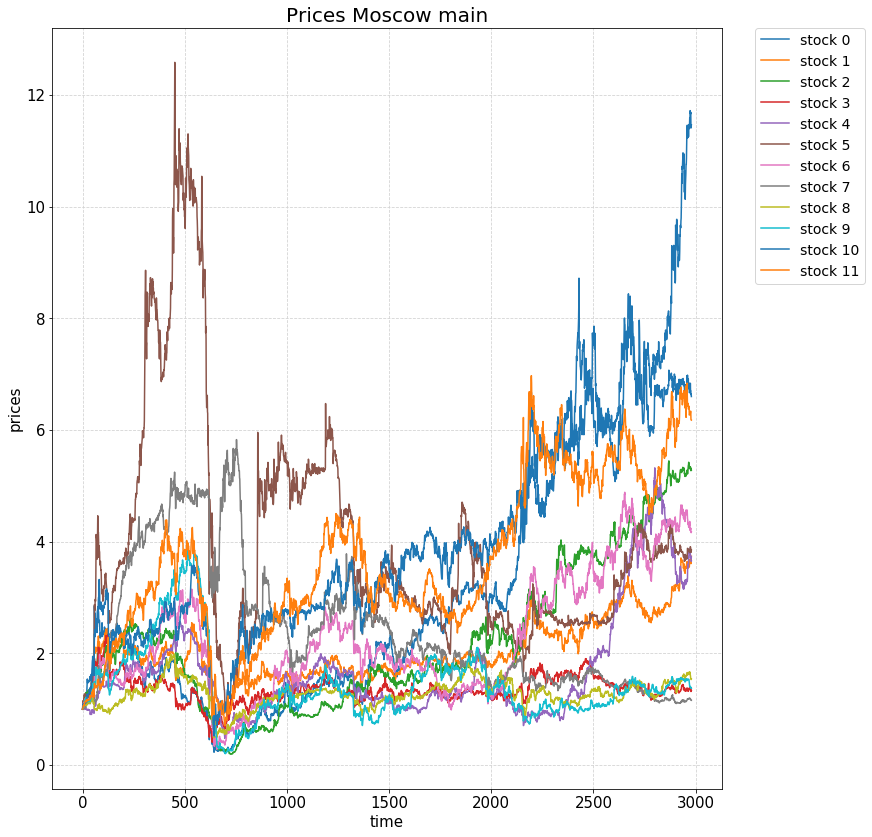

In [9]:
plot_data(data_main_array, "Prices Moscow main", (12, 14), 'prices')

In [10]:
tc = 0.
opts = {'display_interval': 1000}

In [11]:
random_weights = np.random.rand(data_main_ratio.shape[1])
random_weights = random_weights / np.sum(random_weights)

In [23]:
res_bah_main = bah.bah_run(data_main_ratio, tc, opts, random_weights)
res_ubah_main = bah.bah_run(data_main_ratio, tc, opts)
res_bcrp_main = bcrp.bcrp_run(data_main_ratio, tc, opts)
res_best_main = best_stock.best_stock_run(data_main_ratio, tc, opts)
res_crp_main = crp.crp_run(data_main_ratio, tc, opts, random_weights)
res_ucrp_main = crp.crp_run(data_main_ratio, tc, opts)
res_up_main = up.up_run(data_main_ratio, tc, opts)
res_eg_main = eg.eg_run(data_main_ratio, tc, opts)
res_ons_main = ons.ons_run(data_main_ratio, tc, opts)
res_olmar1_main = olmar.olmar_run(data_main_ratio, tc, opts, variant=1, window=5, epsilon=10)
res_olmar2_main = olmar.olmar_run(data_main_ratio, tc, opts, variant=2, alpha=0.5, epsilon=10)

100%|██████████| 2980/2980 [00:00<00:00, 3403.77it/s]


In [12]:
res_rmr_main = rmr.rmr_run(data_main_ratio, tc, opts, epsilon=10, window=5)

100%|██████████| 2980/2980 [00:11<00:00, 253.53it/s]


In [22]:
res_anticor_main = anticor.anticor_run(data_main_ratio, tc, opts)
res_anticor_anticor_main = anticor.anticor_anticor_run(data_main_ratio, tc, opts)
res_pamr_main = pamr.pamr_run(data_main_ratio, tc, opts)
res_corn_main = corn.corn_run(data_main_ratio, tc, opts)

100%|██████████| 2980/2980 [11:08<00:00,  4.46it/s]


In [28]:
results_main = {
    'BAH': res_bah_main, 'UBAH': res_ubah_main, 'BCRP': res_bcrp_main, 
    'Best Stock': res_best_main, 'CRP': res_crp_main, 'UCRP': res_ucrp_main, 
    'UP': res_up_main, 'EG': res_eg_main, 'ONS': res_ons_main, 
    'Anticor': res_anticor_main, 'Anticor(Anticor)': res_anticor_anticor_main,
    'PAMR': res_pamr_main, 'OLMAR-1': res_olmar1_main, 'OLMAR-2': res_olmar2_main,
    'RMR': res_rmr_main, 'CORN': res_corn_main
}

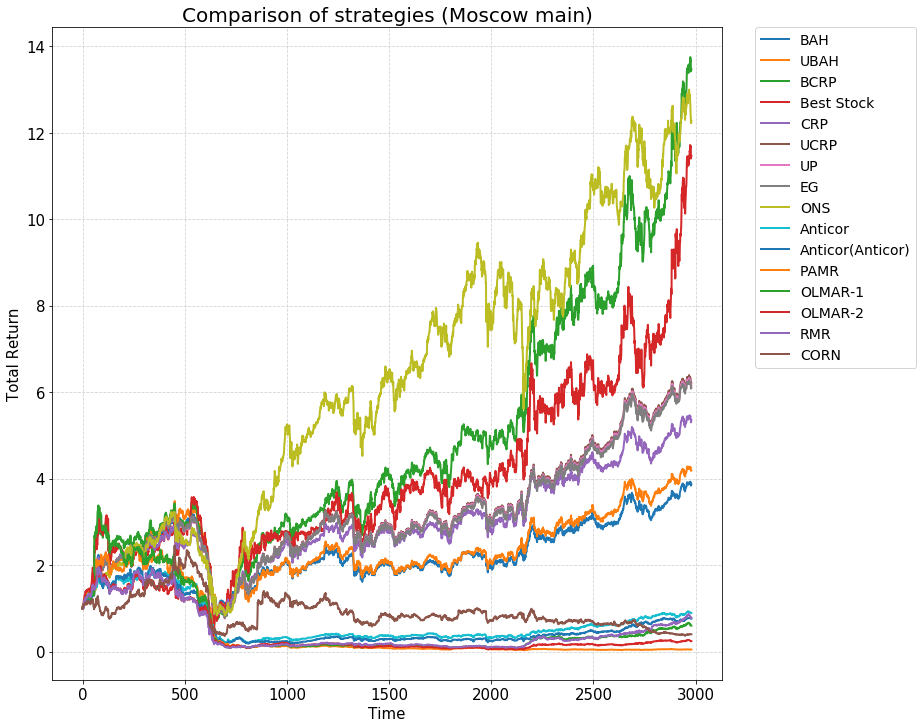

In [29]:
plot_results(results_main, figsize=(12, 12), title="Comparison of strategies (Moscow main)",
             semilogy_flag=False)

We can see that in that case the performance of all Follow-the-Loser strategies is very poor. I think this is due to the financial crisis of 2008, when all stocks went down and Follow-the-Loser strategies lost all money. Almost all algorithm except ONS performs worse than BCRP and Best Stock.

### Moscow new dataset

In [83]:
data_new_df = pd.read_csv('data/moscow_new.csv')
data_new_df.drop(['Unnamed: 0', 'IRAO'], axis=1, inplace=True)

In [84]:
data_new_df.shape

(766, 38)

In [85]:
data_new_df.head()

,URKA,MGNT,NLMK,AFKS,SBER,MVID,TRNFP,LKOH,VSMO,AKRN,...,LSRG,RTKM,NVTK,VTBR,MTSS,SVAV,GAZP,TATN,GMKN,TRMK
0,157.01,8970.0,48.33,43.400,87.81,260.02,77663.0,2047.0,8300.0,1369.9,...,613.0,86.74,382.15,0.05112,290.49,617.0,144.04,210.47,6898.0,81.39
1,154.50,8928.8,47.87,43.750,87.43,259.81,76500.0,2035.0,8200.0,1368.3,...,615.1,84.71,392.56,0.04844,297.00,645.5,142.75,208.79,6882.0,81.40
2,156.99,8980.0,49.27,44.290,89.00,258.99,77870.0,2030.6,8250.0,1234.0,...,623.9,86.16,403.17,0.04689,303.30,647.0,143.97,209.55,6975.0,85.58
3,154.05,8949.0,49.42,44.448,88.89,254.45,77050.0,2025.0,8020.0,1228.0,...,620.8,87.69,405.93,0.04731,297.55,648.0,144.40,207.63,7029.0,87.08
4,157.18,9100.0,48.60,45.499,88.99,256.00,77055.0,2061.4,8096.4,1196.0,...,627.5,88.80,401.37,0.04700,296.63,593.0,144.75,211.00,6900.0,89.69


In [87]:
data_new_array = np.array(data_new_df)
data_new_array /= data_new_array[0]

data_new_ratio = utils.make_ratios(data_new_array)

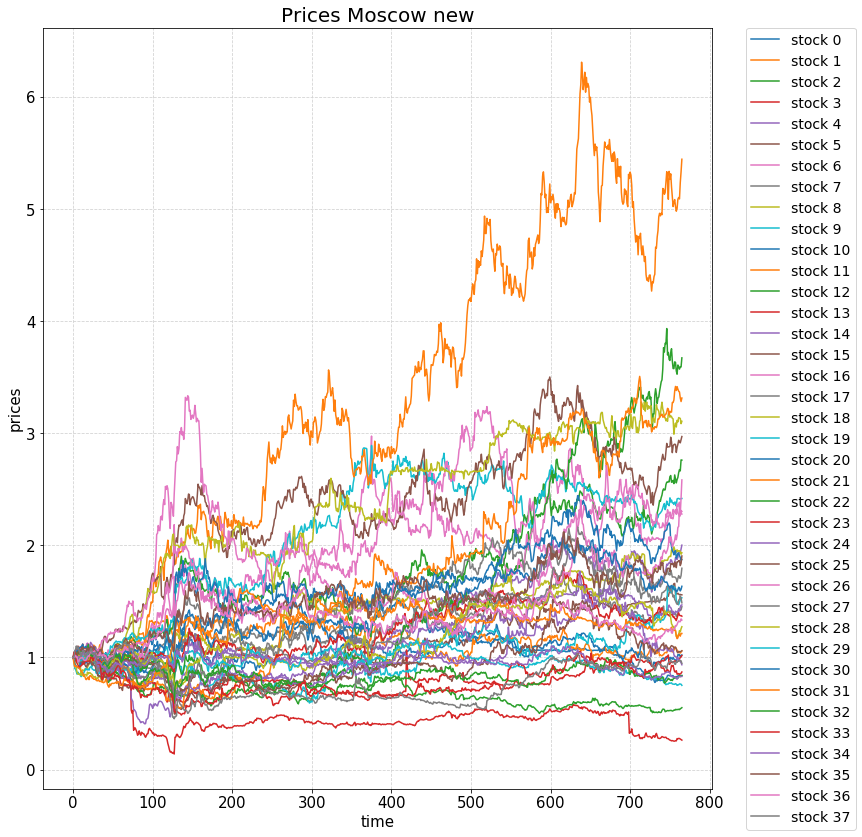

In [88]:
plot_data(data_new_array, "Prices Moscow new", (12, 14), 'prices')

In [89]:
random_weights = np.random.rand(data_new_ratio.shape[1])
random_weights = random_weights / np.sum(random_weights)

In [90]:
res_bah_new = bah.bah_run(data_new_ratio, tc, opts, random_weights)
res_ubah_new = bah.bah_run(data_new_ratio, tc, opts)
res_bcrp_new = bcrp.bcrp_run(data_new_ratio, tc, opts)
res_best_new = best_stock.best_stock_run(data_new_ratio, tc, opts)
res_crp_new = crp.crp_run(data_new_ratio, tc, opts, random_weights)
res_ucrp_new = crp.crp_run(data_new_ratio, tc, opts)
res_up_new = up.up_run(data_new_ratio, tc, opts)
res_eg_new = eg.eg_run(data_new_ratio, tc, opts)
res_ons_new = ons.ons_run(data_new_ratio, tc, opts)
res_olmar1_new = olmar.olmar_run(data_new_ratio, tc, opts, variant=1, window=5, epsilon=10)
res_olmar2_new = olmar.olmar_run(data_new_ratio, tc, opts, variant=2, alpha=0.5, epsilon=10)
res_rmr_new = rmr.rmr_run(data_new_ratio, tc, opts, epsilon=10, window=5)
res_anticor_new = anticor.anticor_run(data_new_ratio, tc, opts)
res_anticor_anticor_new = anticor.anticor_anticor_run(data_new_ratio, tc, opts)
res_pamr_new = pamr.pamr_run(data_new_ratio, tc, opts)
res_corn_new = corn.corn_run(data_new_ratio, tc, opts)

100%|██████████| 766/766 [01:07<00:00, 11.31it/s]


In [91]:
results_new = {
    'BAH': res_bah_new, 'UBAH': res_ubah_new, 'BCRP': res_bcrp_new, 
    'Best Stock': res_best_new, 'CRP': res_crp_new, 'UCRP': res_ucrp_new, 
    'UP': res_up_new, 'EG': res_eg_new, 'ONS': res_ons_new, 
    'Anticor': res_anticor_new, 'Anticor(Anticor)': res_anticor_anticor_new,
    'PAMR': res_pamr_new, 'OLMAR-1': res_olmar1_new, 'OLMAR-2': res_olmar2_new,
    'RMR': res_rmr_new, 'CORN': res_corn_new
}

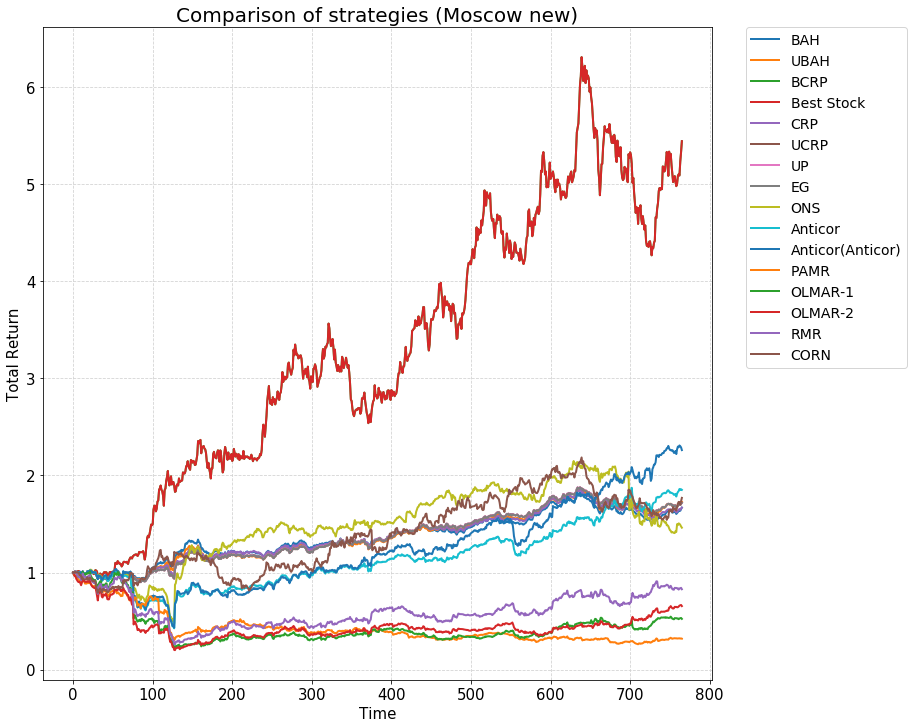

In [93]:
plot_results(results_new, figsize=(12, 12), title="Comparison of strategies (Moscow new)",
             semilogy_flag=False)

In this case almost all Follow-te-Loser strategies are poor except Anticor and Anticor(Anticor) algorithms. However, all strategies are worse than BCRP and Best Stock (that are absolutly equal in this case).

## Conclusions

We have compared several OLPS strategies on 5 datasets. Based on the results we can make such conclusions:
- Follow-the-Loser strategies are not always good;
- it's hard for algorithms to show good quality on Moscow Exchange stocks;
- almost all algorithms do not beat the BCRP and Best Stock.